# OLIMPIJSKE IGRE

Analiza dosežkov na olimpijskih igrah po državah in pogostost posameznih športnih disciplin na olimpijskih igrah.

## Uvoz podatkov

In [1]:
import pandas as pd
%matplotlib inline
pd.options.display.max_rows = 10

MEDALJE_VSE = pd.read_csv("oi8.3_medalje_pregled.csv", index_col=0)
DISCIPLINE = pd.read_csv("oi9.3_discipline_pregled.csv", index_col=0)

In [2]:
vrsta = "summer"    # izberi "summer" za poletne ali "winter" za zimske

In [3]:
MEDALJE = MEDALJE_VSE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_IZBRANE = MEDALJE.filter(like=vrsta.capitalize()).astype(int) \
    .rename(columns=lambda x: x.replace(f"-{vrsta.capitalize()}", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_IZBRANE2 = MEDALJE.filter(like=vrsta.capitalize()).astype(int) \
    .rename(columns=lambda x: x.split('-')[0]).loc[lambda df: ~(df == 0).all(axis=1)] #samo letnice, ne mesta

MEDALJE_ZLATE = MEDALJE_VSE.filter(like="Zlate").astype(int).rename(columns=lambda x: x.replace("-Zlate", "")).loc[lambda df: ~(df == 0).all(axis=1)]

In [4]:
DISCIPLINE_SUMMER = DISCIPLINE.filter(like="Summer").astype(int).rename(columns=lambda x: x.replace("-Summer", "")).loc[lambda df: ~(df == 0).all(axis=1)]
DISCIPLINE_WINTER = DISCIPLINE.filter(like="Winter").astype(int).rename(columns=lambda x: x.replace("-Winter", "")).loc[lambda df: ~(df == 0).all(axis=1)]
DISCIPLINE_IZBRANE = DISCIPLINE.filter(like=vrsta.capitalize()).astype(int).rename(columns=lambda x: x.replace(f"-{vrsta.capitalize()}", "")).loc[lambda df: ~(df == 0).all(axis=1)]
DISCIPLINE2_IZBRANE = DISCIPLINE.filter(like=vrsta.capitalize()).astype(int).rename(columns=lambda x: x.split('-')[0]).loc[lambda df: ~(df == 0).all(axis=1)]

## Splošno

Število olimpijskih iger

In [5]:
print(f"Skupaj olimpijskih iger: {len(DISCIPLINE.columns)}")
print(f"Poletne olimpijske igre: {len(DISCIPLINE_SUMMER.columns)}")
print(f"Zimske olimpijske igre: {len(DISCIPLINE_WINTER.columns)}")

Skupaj olimpijskih iger: 54
Poletne olimpijske igre: 30
Zimske olimpijske igre: 24


Lokacija olimpijskih iger

In [6]:
kraji = DISCIPLINE.columns.str.split("-", n=2).str[1].value_counts()
kraji_najvec_oi = kraji[kraji == kraji.max()]

print(f"Največrat so se Olimpijske igre odvijale v {", ".join(kraji_najvec_oi.index)} in sicer {kraji.max()}-krat.")

Največrat so se Olimpijske igre odvijale v Paris, London in sicer 3-krat.


In [7]:
mesto = "Tokyo"     # izberi mesto za katero te zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto.replace(" ", "_")}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto.replace(" ", "_")]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Tokyo je gostilo Olimpijske igre 2-krat, in sicer leta 1964, 2020.


In [8]:
mesto = "Ljubljana"     # izberi mesto za katero te zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto.replace(" ", "_")}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto.replace(" ", "_")]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Ljubljana ni nikoli gostilo Olimpijskih iger.


## Medalje

Podeljene medalje po letih

In [9]:
MEDALJE.loc['Skupaj'] = MEDALJE.drop('Skupaj', errors='ignore').sum()
MEDALJE_IZBRANE.loc['Skupaj'] = MEDALJE_IZBRANE.drop('Skupaj', errors='ignore').sum()
MEDALJE_IZBRANE2.loc['Skupaj'] = MEDALJE_IZBRANE2.drop('Skupaj', errors='ignore').sum()

vrsta_ih = "poletnih" if vrsta == "summer" else "zimskih"
vrsta_e = "poletne" if vrsta == "summer" else "zimske"

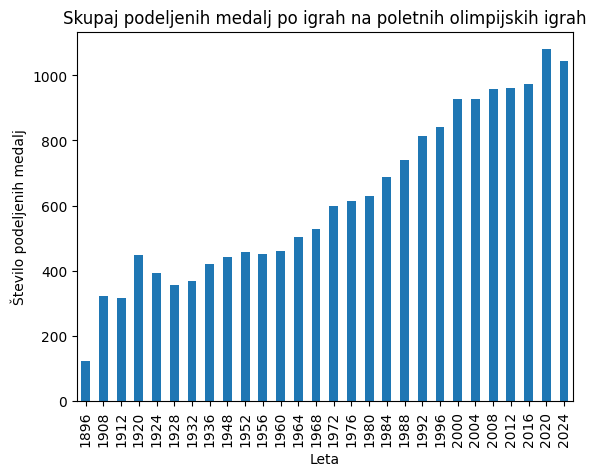

In [10]:
MEDALJE_IZBRANE2.loc['Skupaj'].plot.bar(title=f"Skupaj podeljenih medalj po igrah na {vrsta_ih} olimpijskih igrah", ylabel="Število podeljenih medalj", xlabel="Leta");

Katera država jih je tekom vseh let dobila največ in koliko, katero leto največ

In [11]:
MEDALJE = MEDALJE.drop(index='Skupaj', columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)
MEDALJE_IZBRANE = MEDALJE_IZBRANE.drop(index='Skupaj', columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)
MEDALJE_ZLATE = MEDALJE_ZLATE.drop(index='Skupaj', columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)

In [12]:
print(f"Od leta {MEDALJE.columns[0].split('-')[0]} je na olimpijskih igrah "
      f"skupno največ medalj dosegla {MEDALJE.index[0]} in sicer {MEDALJE.iloc[0, -1]}.\n"
      f"Največ medalj so osvojili leta {MEDALJE.iloc[0, :-1].idxmax().split('-')[0]} "
      f"v mestu {MEDALJE.iloc[0, :-1].idxmax().split('-')[1].replace('_', ' ')} "
      f"in sicer {MEDALJE.iloc[0, :-1].max()}.")

Od leta 1896 je na olimpijskih igrah skupno največ medalj dosegla United States of America in sicer 2815.
Največ medalj so osvojili leta 1984 v mestu Los Angeles in sicer 174.


In [13]:
print(f"Od leta {MEDALJE_IZBRANE.columns[0].split('-')[0]} je na {vrsta_ih} olimpijskih igrah "
      f"skupno največ medalj dosegla {MEDALJE_IZBRANE.index[0]} in sicer {MEDALJE_IZBRANE.iloc[0, -1]}.\n"
      f"Največ medalj so osvojili leta {MEDALJE_IZBRANE.iloc[0, :-1].idxmax().split('-')[0]} "
      f"v mestu {MEDALJE_IZBRANE.iloc[0, :-1].idxmax().split('-')[1].replace("_", " ")} "
      f"in sicer {MEDALJE_IZBRANE.iloc[0, :-1].max()}.")

Od leta 1896 je na poletnih olimpijskih igrah skupno največ medalj dosegla United States of America in sicer 2485.
Največ medalj so osvojili leta 1984 v mestu Los Angeles in sicer 174.


In [14]:
print(f"Od leta {MEDALJE_ZLATE.columns[0].split('-')[0]} je na olimpijskih igrah "
      f"skupno največ zlatih medalj dosegla {MEDALJE_ZLATE.index[0]} in sicer {MEDALJE_ZLATE.iloc[0, -1]}.\n"
      f"Največ zlatih medalj so osvojili leta {MEDALJE_ZLATE.iloc[0, :-1].idxmax().split('-')[0]} "
      f"v mestu {MEDALJE_ZLATE.iloc[0, :-1].idxmax().split('-')[1].replace('_', ' ')} "
      f"in sicer {MEDALJE_ZLATE.iloc[0, :-1].max()}.")

Od leta 1896 je na olimpijskih igrah skupno največ zlatih medalj dosegla United States of America in sicer 1124.
Največ zlatih medalj so osvojili leta 1984 v mestu Los Angeles in sicer 83.


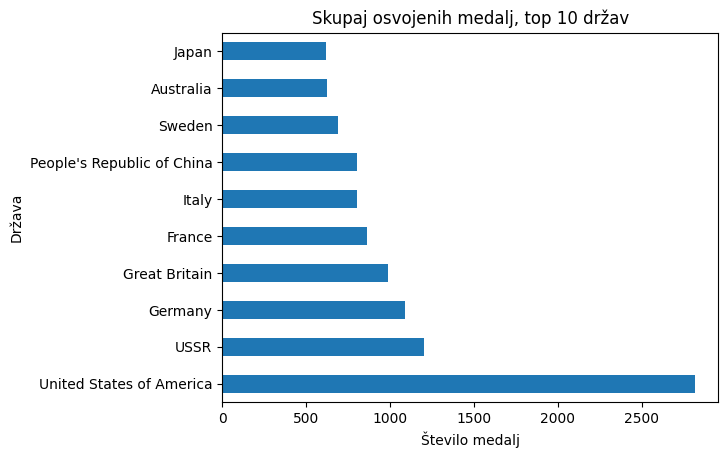

In [15]:
MEDALJE['Skupaj'].head(10).plot.barh(title="Skupaj osvojenih medalj, top 10 držav", xlabel="Število medalj", ylabel="Država");

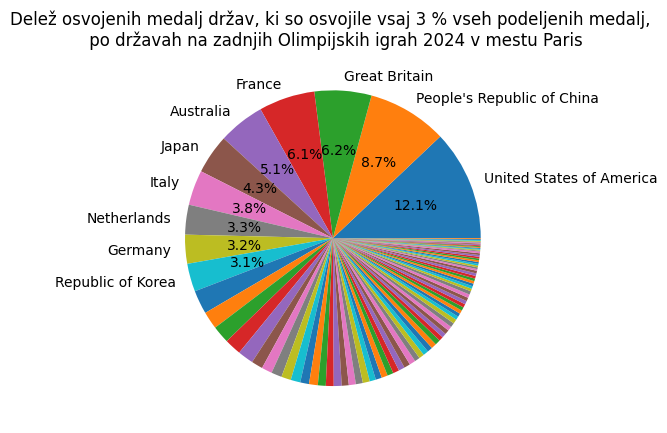

In [16]:
meja = 3    # meja v % za prikaz držav na spodnjem grafu, lahko spreminjam

medalje_zadnjeigre = MEDALJE[[MEDALJE.columns[-2]]].loc[lambda df: df[df.columns[0]] != 0]
medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False).plot.pie(
    y=medalje_zadnjeigre.columns[0],
    title=f"Delež osvojenih medalj držav, ki so osvojile vsaj {meja} % vseh podeljenih medalj, \n po državah na zadnjih "
          f"Olimpijskih igrah {medalje_zadnjeigre.columns[0].split('-')[0]} v mestu {medalje_zadnjeigre.columns[0].split('-')[1]}",
    ylabel="",
    legend=False,
    labels=[ime if pct >= meja else '' 
        for ime, pct in zip(medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False).index,
            100 * medalje_zadnjeigre.sort_values(by=medalje_zadnjeigre.columns[0], ascending=False)[medalje_zadnjeigre.columns[0]] / 
            medalje_zadnjeigre[medalje_zadnjeigre.columns[0]].sum())],
    autopct=lambda pct: f"{pct:.1f}%" if pct >= meja else "");


Katere države so skupno dosegle več medalj kot povprečje držav, ki so osvojile vsaj eno medaljo

In [17]:
MEDALJE_BOLJSE = MEDALJE[MEDALJE['Skupaj'] >= MEDALJE['Skupaj'].mean()]
MEDALJE_BOLJSE.iloc[:, [-1]]

,Skupaj
Država,
United States of America,2815
USSR,1204
Germany,1087
Great Britain,987
France,863
...,...
Brazil,170
Belgium,166
New Zealand,163


Katere države so na zadnji olimpijskih igrah dosegle več medalj kot povprečje držav, ki so osvojile vsaj eno medaljo

In [18]:
medalje_zadnjeigre = MEDALJE[[MEDALJE.columns[-2]]].loc[lambda df: df[df.columns[0]] != 0]
boljse_od_povprecja = medalje_zadnjeigre.loc[lambda df: df[df.columns[0]] >= df[df.columns[0]].mean()].sort_values(by=medalje_zadnjeigre.columns[0], ascending=False)
boljse_od_povprecja

,2024-Paris-Summer
Država,
United States of America,126
People's Republic of China,91
Great Britain,65
France,64
Australia,53
...,...
Hungary,19
Spain,18
Uzbekistan,13


## Discipline

Koliko različnih disciplin je bilo na olimpijskih igrah

In [19]:
print(f"Število poletnih disciplin: {len(DISCIPLINE_SUMMER)}")
print(f"Število zimskih disciplin: {len(DISCIPLINE_WINTER)}")
print(f"Skupno število disciplin: {len(DISCIPLINE)}")
na_obeh = set(DISCIPLINE_SUMMER.index) & set(DISCIPLINE_WINTER.index)
print(f"Discipline, prisotne na poletnih in zimskih igrah: {', '.join(sorted(na_obeh))}")
# opomba: zimske olimpijske igre so se pojavile šele leta 1924, zato so pred tem bile nekatere zimske discipline (figure skating, ice hockey) na poletnih

Število poletnih disciplin: 72
Število zimskih disciplin: 17
Skupno število disciplin: 87
Discipline, prisotne na poletnih in zimskih igrah: Figure skating, Ice Hockey


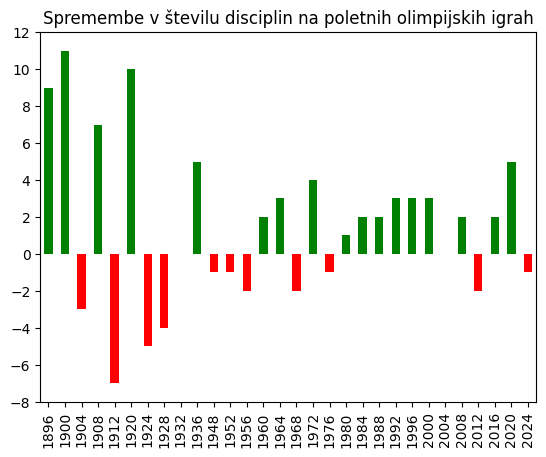

In [20]:
stevilo_disciplin_na_leto = DISCIPLINE2_IZBRANE.sum(axis=0).astype(int)
spremembe = stevilo_disciplin_na_leto.diff().fillna(stevilo_disciplin_na_leto.iloc[0]).astype(int)

barve = ['red' if x < 0 else 'green' for x in spremembe]
spremembe.plot(kind="bar", title=f"Spremembe v številu disciplin na {vrsta_ih} olimpijskih igrah", color=barve, \
               yticks=range((spremembe.min() // 2) * 2, spremembe.max() + 2, 2));

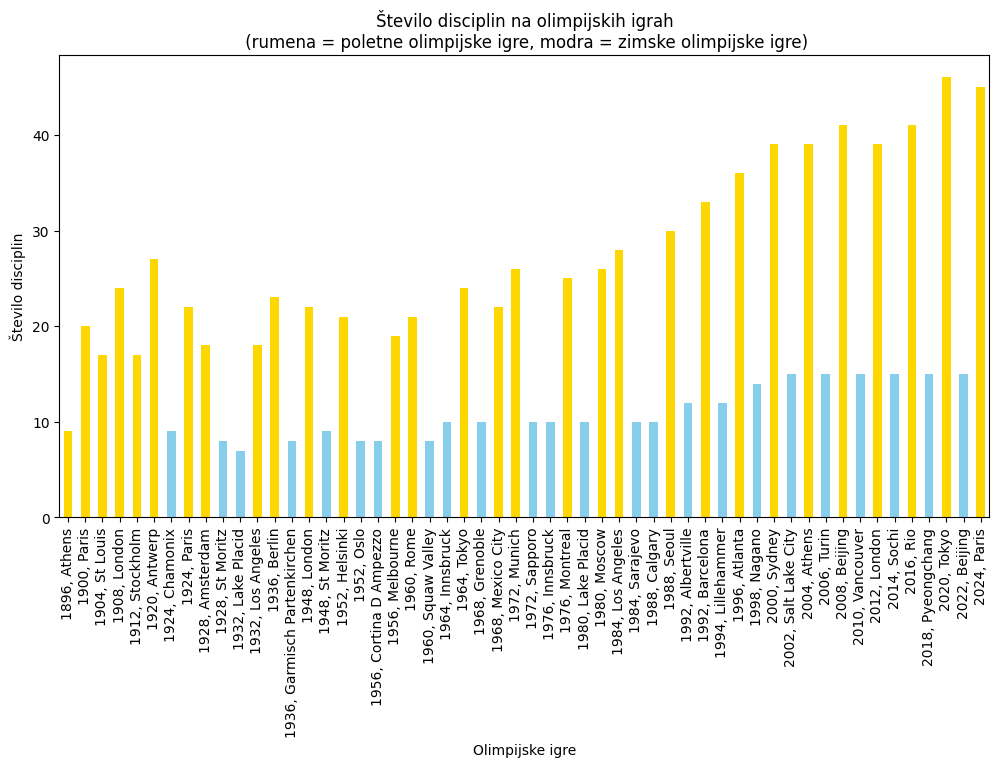

In [21]:
stevilo_disciplin = DISCIPLINE.sum(axis=0).astype(int)
barve = ['gold' if 'Summer' in igra else 'skyblue' for igra in stevilo_disciplin.index]
stevilo_disciplin.index = stevilo_disciplin.index.str.rsplit('-', n=1).str[0].str.replace("_", " ").str.replace("-", ", ")

stevilo_disciplin.plot(kind='bar', color=barve, figsize=(12,6),
                       title="Število disciplin na olimpijskih igrah\n (rumena = poletne olimpijske igre, modra = zimske olimpijske igre)",
                       ylabel="Število disciplin", xlabel="Olimpijske igre");

Pogostost disciplin

In [22]:
DISCIPLINE = DISCIPLINE.drop(columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)
DISCIPLINE_IZBRANE = DISCIPLINE_IZBRANE.drop(columns='Skupaj', errors='ignore')\
    .assign(Skupaj=lambda df: df.sum(axis=1)).sort_values(by="Skupaj", ascending=False)

In [23]:
top_5 = DISCIPLINE["Skupaj"].nlargest(5).min()  # top 5 disciplin, kjer v primeru enakega števila pojavitve prikaže vse na meji
rezultat = DISCIPLINE.loc[DISCIPLINE["Skupaj"] >= top_5]
rezultat.iloc[:, [-1]]

,Skupaj
Disciplina,
Athletics,30
Swimming,30
Fencing,30
Cycling Track,29
Rowing,29
Wrestling,29
Water Polo,29


In [24]:
max_pojavitev = DISCIPLINE["Skupaj"].max()
najbolj_pogoste = DISCIPLINE.loc[DISCIPLINE["Skupaj"] == max_pojavitev].index.tolist()
print(f"Najbolj pogoste discipline so: {', '.join(najbolj_pogoste)}.")

Najbolj pogoste discipline so: Athletics, Swimming, Fencing.


In [25]:
max_pojavitev = DISCIPLINE_IZBRANE["Skupaj"].max()
najbolj_pogoste = DISCIPLINE_IZBRANE.loc[DISCIPLINE_IZBRANE["Skupaj"] == max_pojavitev].index.tolist()
print(f"Najbolj pogoste {vrsta_e} discipline so: {', '.join(najbolj_pogoste)}.")

Najbolj pogoste poletne discipline so: Athletics, Fencing, Swimming.


## Rezultati posamezne države

Osvojene medalje tekom let

In [26]:
drzava = "United States of America"     # izberi državo za katero te zanima

if drzava not in MEDALJE.index.tolist():
    print(f"{drzava} ni osvojila nobene medalje ali pa njeno ime ni pravilno napisano (ime mora biti zapisano angleško).")
    print(f"Možne države so: {', '.join(MEDALJE.index.tolist())}.")

In [27]:
MEDALJE = MEDALJE.drop(index='Skupaj', columns='Skupaj', errors='ignore')
MEDALJE_IZBRANE = MEDALJE_IZBRANE.drop(index='Skupaj', columns='Skupaj', errors='ignore')

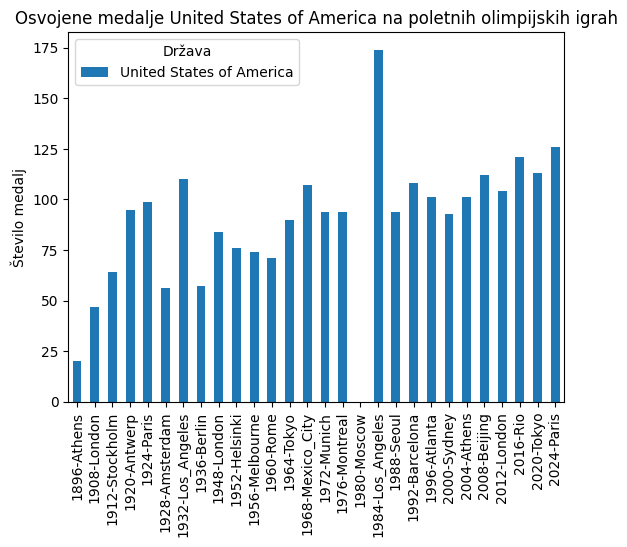

In [28]:
MEDALJE_IZBRANE.loc[[drzava]].T.plot(kind='bar', title=f"Osvojene medalje {drzava} na {vrsta_ih} olimpijskih igrah", ylabel="Število medalj");

In [29]:
najvec_igre = MEDALJE.loc[drzava].idxmax()
leto = najvec_igre.split('-')[0]
mesto = najvec_igre.split('-')[1].replace("_", " ")

print(f"Največ medalj so osvojili na letu {leto} v mestu {mesto} in sicer {MEDALJE.loc[drzava, najvec_igre]}.")

Največ medalj so osvojili na letu 1984 v mestu Los Angeles in sicer 174.


In [30]:
if "0" not in MEDALJE.loc[drzava].astype(str).values:
    print(f"Država {drzava} je na vsakih olimpijskih igrah osvojila vsaj eno medaljo.")
else:
    neuspesne_igre = MEDALJE.loc[drzava][MEDALJE.loc[drzava] == 0]
    leta = neuspesne_igre.rename(lambda x: x.split('-')[0]).index
    mesta = neuspesne_igre.rename(lambda x: x.split('-')[1]).index.str.replace("_", " ")
    neuspesna_leta = [f"leta {l} v mestu {m}" for l, m in zip(leta, mesta)]

    print(f"Država {drzava} nobene medalje ni osvojila {', '.join(neuspesna_leta)}.")

Država United States of America nobene medalje ni osvojila leta 1980 v mestu Moscow.


Delež osvojenih medalj od vseh podeljenih

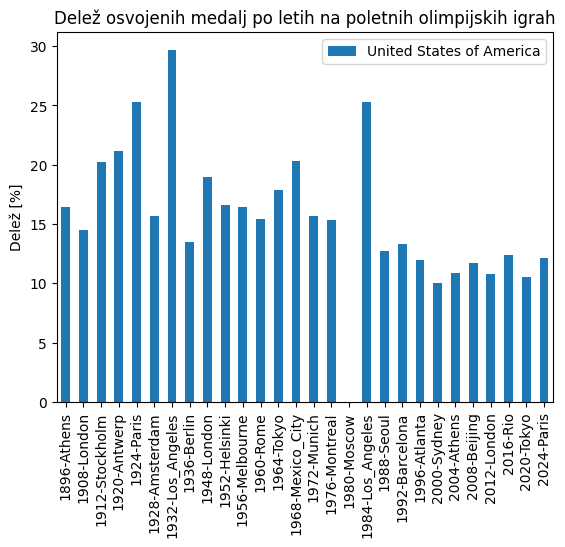

In [31]:
MEDALJE_IZBRANE.loc['Skupaj'] = MEDALJE_IZBRANE.sum()
MEDALJE_DELEZ = (MEDALJE_IZBRANE.loc[drzava] / MEDALJE_IZBRANE.drop(index='Skupaj', errors='ignore').sum() * 100).to_frame().T.round(1)
MEDALJE_DELEZ.index = [drzava]
MEDALJE_DELEZ.T.plot(kind='bar', title=f'Delež osvojenih medalj po letih na {vrsta_ih} olimpijskih igrah', ylabel='Delež [%]', xlabel='');